## 데이터 분석 기본 - 위치 정보 시각화
  - 우리 동네 의류 수거함 데이터 시각화

### [학습 목표]
 - 우리 동네 의류 수거함 위치를 시각화를 수행합니다.

### [학습 내용]
  - (1) 공공 데이터 가져오기 및 데이터 탐색
  - (2) 우리 동네 의류 수거함 위치 정보 시각화

### 라이브러리 설치

In [4]:
!pip install folium

### 1-2 우리 동네 의류 수거함 위치 확인

### (1) 공공 데이터 가져오기 및 데이터 탐색

### 데이터 가져오기
 - 사이트 : https://www.data.go.kr/
 - 파일 : 서울특별시 영등포구_의류수거함 위치현황
 - 코랩에 데이터를 올리고, 데이터 불러오기

In [13]:
### 공공 데이터 가져와 데이터 탐색
import pandas as pd

# 한국어 인코딩을 고려하여 데이터 다시 로드
file_path = "data.csv"
data_kr = pd.read_csv(file_path, encoding='euc-kr')
data_kr

,행정동,도로명주소,지번주소,위도,경도,데이터기준일자
0,영등포본동,서울특별시 영등포구 도신로51길 9,서울특별시 영등포구 신길동 186-230,37.512462,126.913378,2023-09-01
1,영등포본동,서울특별시 영등포구 영신로9라길 6,서울특별시 영등포구 영등포동 631-8,37.512840,126.905889,2023-09-01
2,영등포본동,서울특별시 영등포구 신길로61길 17,서울특별시 영등포구 영등포동 592-70,37.514666,126.909339,2023-09-01
3,영등포본동,서울특별시 영등포구 신길로 276,서울특별시 영등포구 영등포동 585-25,37.516106,126.912731,2023-09-01
4,영등포본동,서울특별시 영등포구 영등포로60길 29,서울특별시 영등포구 신길동 35,37.516798,126.915017,2023-09-01
...,...,...,...,...,...,...
248,대림제3동,서울특별시 영등포구 도림로47가길 14,서울특별시 영등포구 대림동 754-8,37.497528,126.901060,2023-09-01
249,대림제3동,서울특별시 영등포구 도림로47길 23,서울특별시 영등포구 대림동 691-8,37.497361,126.899422,2023-09-01
250,대림제3동,서울특별시 영등포구 대림로35길(동심어린이공원),NaN,NaN,NaN,2023-09-01
251,대림제3동,서울특별시 영등포구 도림로39길 21,서울특별시 영등포구 대림동 713-7,NaN,NaN,2023-09-01


# 위도 경도
```
위도 = Latitude
 위도는 지구 적도를 기준으로 북쪽 또는 남쪽으로 떨어진 각도를 나타내며,
경도 = Longitude
 경도는 본초자오선(그리니치 천문대를 지나는 자오선)을 기준으로 동쪽 또는 서쪽으로 떨어진 각도를 나타냅니다.
```

Text(0, 0.5, 'Latitude')

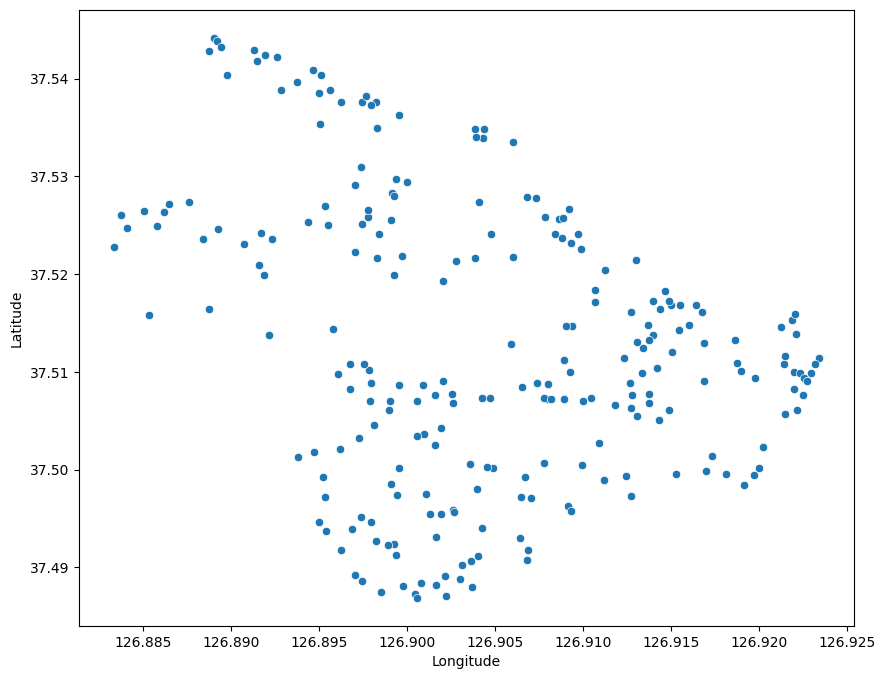

In [6]:
### 라이브러리 불러오기
import seaborn as sns
import matplotlib.pyplot as plt

# 위도, 경도 정보 시각화
plt.figure(figsize=(10, 8))
ax = sns.scatterplot(x='경도', y='위도', data=data_kr)
plt.xlabel('Longitude')  # 경도
plt.ylabel('Latitude')   # 위도

In [7]:
# 정보 확인
data_kr.columns

Index(['행정동', '도로명주소', '지번주소', '위도', '경도', '데이터기준일자'], dtype='object')

In [8]:
# 행과 열
data_kr.shape

(253, 6)

In [9]:
# 전체 정보 및 결측지 정보 확인
data_kr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253 entries, 0 to 252
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   행정동      253 non-null    object 
 1   도로명주소    252 non-null    object 
 2   지번주소     251 non-null    object 
 3   위도       244 non-null    float64
 4   경도       244 non-null    float64
 5   데이터기준일자  253 non-null    object 
dtypes: float64(2), object(4)
memory usage: 12.0+ KB


In [11]:
# 결측치 확인
data_kr.isnull().sum()

행정동        0
도로명주소      1
지번주소       2
위도         9
경도         9
데이터기준일자    0
dtype: int64

In [12]:
# 기술 통계
data_kr.describe()

,위도,경도
count,244.000000,244.000000
mean,37.512535,126.904410
std,0.014510,0.009622
min,37.486899,126.883325
25%,37.501127,126.897626
50%,37.510300,126.903580
75%,37.523795,126.912346
max,37.544192,126.923385


### (2) 우리 동네 의류 수거함 위치 정보 시각화

In [17]:
### 2-1 위치 정보 시각화
import folium

# 데이터 중 위도와 경도가 모두 있는 데이터만 필터링
valid_locations = data_kr.dropna(subset=['위도', '경도'])

# 첫 번째 위치를 기준으로 지도 생성
x = valid_locations['위도'].iloc[0]
y = valid_locations['경도'].iloc[0]
map = folium.Map(location=[x, y], zoom_start=15)

# 각 위치를 지도에 마커로 추가
# 37.512462	126.913378
folium.Marker([x, y], popup='수거함 1').add_to(map)

# 각 위치를 지도에 마커로 추가
for idx, row in valid_locations.iterrows():
  folium.Marker([row['위도'], row['경도']], popup=row['행정동']).add_to(map)

# 지도 출력
map

```
Folium과 함께 자주 사용되는 기본 아이콘은 주로 Font Awesome 또는 Bootstrap Glyphicons에서 제공하는 것들입니다. 이 아이콘들은 다양한 웹 프로젝트에서 널리 사용되며, 지도상의 마커로서도 인기가 많습니다. Font Awesome과 Bootstrap Glyphicons는 각각 다양한 아이콘을 제공하여 사용자들이 원하는 메시지를 효과적으로 전달할 수 있도록 돕습니다.

Font Awesome에서 많이 사용되는 아이콘 중 몇 가지 예시를 들어보겠습니다:

fa-map-marker: 위치나 지점을 나타낼 때 사용되는 클래식한 마커 아이콘입니다.
fa-heart: 좋아하는 장소나 관심 지역을 나타내는 데 사용됩니다.
fa-star: 추천하거나 중요하다고 생각하는 장소를 표시하는 데 사용됩니다.
fa-car: 주차 가능 지역, 렌터카 서비스 위치 등 자동차 관련 위치를 나타낼 때 사용합니다.
fa-tree: 공원, 자연 관련 지역을 나타낼 때 사용됩니다.
fa-home: 주거지역, 호텔, 숙박 시설 등을 나타낼 때 사용합니다.
아이콘을 사용할 때는 icon 매개변수에 아이콘의 이름을, prefix 매개변수에 'fa'를 설정하여 사용합니다. 예를 들어, fa-map-marker 아이콘을 사용하려면 다음과 같이 설정합니다:
```

In [18]:
### 2-2 이미지 아이콘 변경해 보기.
# 지도에 표시할 새로운 마커 아이콘으로 'fa-heart' (하트 모양)을 사용하는 예제
map_with_icons = folium.Map(location=[x, y], zoom_start=15)

for idx, row in valid_locations.iterrows():
    folium.Marker(
        [row['위도'], row['경도']],
        popup=row['행정동'],
        icon=folium.Icon(icon='heart', prefix='fa', color='red')
    ).add_to(map_with_icons)

# 지도 출력
map_with_icons

### 이미지 아이콘 바꾸기

In [19]:
### 2-3 이미지 아이콘 변경해 보기.(별)
# 지도에 표시할 새로운 마커 아이콘으로 'fa-star' (별 모양)을 사용하는 예제
map_with_icons = folium.Map(location=[x, y], zoom_start=15)

for idx, row in valid_locations.iterrows():
    folium.Marker(
        [row['위도'], row['경도']],
        popup=row['행정동'],
        icon=folium.Icon(icon='star', prefix='fa', color='orange')
    ).add_to(map_with_icons)

map_with_icons.save("multiple_star.html")
map_with_icons